In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10

In [47]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [48]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [49]:
train_filter = np.isin(y_train, [3, 5])
test_filter = np.isin(y_test, [3, 5])

In [50]:
X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

In [51]:
X_train = X_train.reshape(-1, 32*32*3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32*32*3).astype('float32') / 255.0

In [52]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [53]:
svm = SVC(kernel='linear', random_state=42)

In [54]:
print("X_train shape:", X_train.shape)

X_train shape: (10000, 3072)


In [55]:
X_train_small = X_train[:200]
y_train_small = y_train[:200]

print("Training smaller SVM...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_small, y_train_small)
print("Training complete.")

Training smaller SVM...
Training complete.


In [56]:
svm = SVC(kernel='linear', random_state=42, verbose=True)

In [57]:
from sklearn.svm import SVC

# Use only the first 300 samples to make it run faster
X_small = X_train[:300]
y_small = y_train[:300]

print("Training SVM on 300 samples...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_small, y_small)
print("✅ Training complete.")

Training SVM on 300 samples...
✅ Training complete.


In [58]:
from sklearn.svm import LinearSVC

print("Training fast LinearSVC...")
svm = LinearSVC(max_iter=10000, random_state=42)
svm.fit(X_train, y_train)

print("Predicting...")
y_pred = svm.predict(X_test)
print("✅ Prediction complete.")

Training fast LinearSVC...
Predicting...
✅ Prediction complete.


In [59]:
target_names = ['cat', 'dog']
print("\n🎯 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


🎯 Classification Report:

              precision    recall  f1-score   support

         cat       0.57      0.56      0.57      1000
         dog       0.57      0.57      0.57      1000

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



In [61]:
cat_indices = np.where(y_test == 0)[0]
dog_indices = np.where(y_test == 1)[0]

In [62]:
cat_samples = np.random.choice(cat_indices, 2, replace=False)
dog_samples = np.random.choice(dog_indices, 2, replace=False)

In [63]:
selected_indices = np.concatenate([cat_samples, dog_samples])

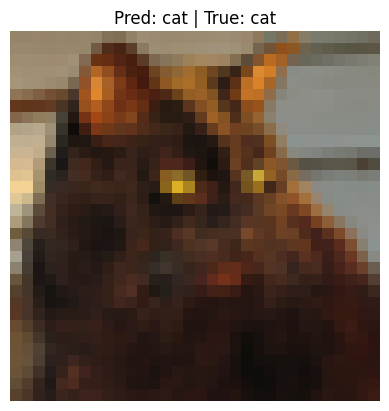

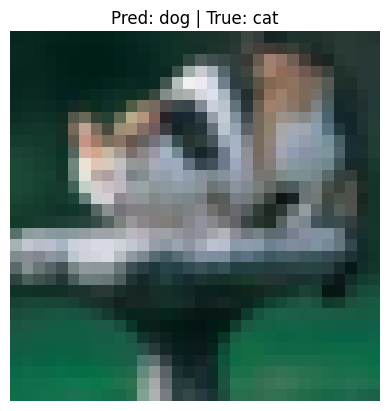

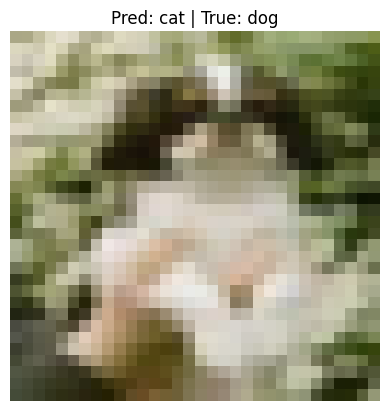

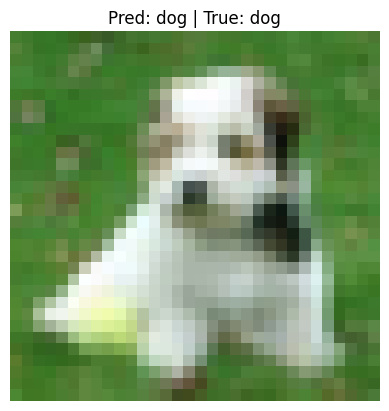

In [64]:
for i in selected_indices:
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.title(f"Pred: {target_names[y_pred[i]]} | True: {target_names[y_test[i]]}")
    plt.axis('off')
    plt.show()